<a href="https://colab.research.google.com/github/fabiodemo/Deep-Learning-CV-CNN-TL/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download da Base de Dados

In [1]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz

--2022-09-23 00:51:53--  https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.177.13
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.177.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1343715595 (1.3G) [application/x-tar]
Saving to: ‘imagewoof2.tgz’

imagewoof2.tgz      100%[===================>]   1.25G  12.2MB/s    in 1m 47s  

2022-09-23 00:53:41 (11.9 MB/s) - ‘imagewoof2.tgz’ saved [1343715595/1343715595]



In [2]:
!tar zxvf imagewoof2.tgz

A saída de streaming foi truncada nas últimas 5000 linhas.
imagewoof2/train/n02115641/n02115641_9529.JPEG
imagewoof2/train/n02115641/n02115641_12039.JPEG
imagewoof2/train/n02115641/n02115641_8768.JPEG
imagewoof2/train/n02115641/n02115641_7188.JPEG
imagewoof2/train/n02115641/n02115641_6633.JPEG
imagewoof2/train/n02115641/n02115641_25018.JPEG
imagewoof2/train/n02115641/n02115641_10706.JPEG
imagewoof2/train/n02115641/n02115641_11814.JPEG
imagewoof2/train/n02115641/n02115641_51135.JPEG
imagewoof2/train/n02115641/n02115641_7409.JPEG
imagewoof2/train/n02115641/n02115641_29257.JPEG
imagewoof2/train/n02115641/n02115641_17997.JPEG
imagewoof2/train/n02115641/n02115641_6473.JPEG
imagewoof2/train/n02115641/n02115641_2963.JPEG
imagewoof2/train/n02115641/n02115641_52488.JPEG
imagewoof2/train/n02115641/n02115641_6536.JPEG
imagewoof2/train/n02115641/n02115641_6166.JPEG
imagewoof2/train/n02115641/n02115641_21519.JPEG
imagewoof2/train/n02115641/n02115641_504.JPEG
imagewoof2/train/n02115641/n02115641_140

In [13]:
import glob
import random
import matplotlib.pyplot as plt
from PIL import Image

In [14]:
all_train_paths = glob.glob('/content/imagewoof2/train/*/*.JPEG')

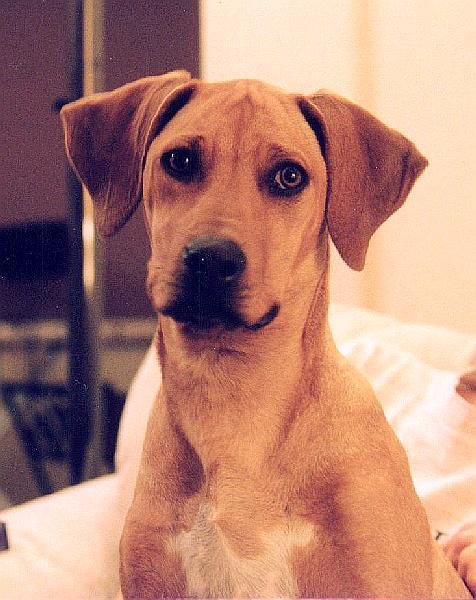

In [15]:
img_path = random.choice(all_train_paths)
Image.open(img_path)

## Declarando ImageDataGenerator

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [25]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [33]:
train_gen = datagen.flow_from_directory('/content/imagewoof2/train',
                            target_size=(224, 224),
                            class_mode='sparse',
                            )

valid_gen = datagen.flow_from_directory('/content/imagewoof2/val',
                            target_size=(224, 224),
                            class_mode='sparse',
                            )

Found 9025 images belonging to 10 classes.
Found 3929 images belonging to 10 classes.


In [28]:
len(all_train_paths)

9025

## Declarando Modelo

In [30]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [34]:
base_model = ResNet50(include_top=False,
                      input_shape=(224,224,3),
                      )

94781440/94765736 [==============================] - 0s 0us/step


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

Precisamos congelar a camada pré-treinada (reaproveitar os pesos do modelo pré-treinado), mudando o parâmetro individual de cada layer

In [36]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
model = Sequential([
                    base_model,
                    GlobalAveragePooling2D(),
                    Dense(1024, activation='relu'), # saida terá aprox. 2048 valores, então usamos metade disso para a camada oculta
                    Dense(10, activation='softmax') # softmax retornará probabilidades de cada uma das 10 saídas
                    ])

## Treinar o modelo

## Visualizando Predições